<h1><center> $Hepatitis \ C \ Virus \ (HCV) \ Classification$
<br>
$Sawsan \ Awad$
<br>
$CS \ 5310: Data \ Mining$
<br>
</center></h1>

### Table of Contents

- Introduction
- Data Source
- Importing Libraries
- Loading Data
- Explaining features and Label
- EDA and Data Preparation
- Modeling (Imbalanced data)
- Different Metrics and Interpretation for Imbalanced models
- Modeling (Balanced data)
- Different Metrics and Interpretation for Balanced models
- Feature importances based on balanced decision tree and random forest models:
- Conclusion

### 1- Introduction

hepatitis C virus (HCV) is a virus that causes Hepatitis C infection. It infects and inflames the liver and could lead to serious liver damage or sometimes it becomes life threatening. HCV IS mostly transmitted via contaminated blood. HCV can begin as mild short-term infections which is called acute hepatitis C. However, if the virus remains in the body, the body will eventually be unable to fight the virus, therefore it causes chronic (long-term) infection which causes severe liver failure, liver cancer or even death. Statistics show that more than 50% of patients with acute HCV will develop the chronic HCV. There is no vaccine for hepatitis C yet. Diagnosing or evaluating the level of HCV virus can be done by a blood test that checks for antibodies that are released by the patient’s body to fight the virus, and measures different enzymes and proteins in the liver such as Alkaline phosphatase, Aspartate Transaminase and Albumin. These substances can be leaked into the bloodstream due to a liver damage and HCV test helps detecting all these substances and evaluating the patient’s liver condition.

In this report, First, I will be using multiple supervised machine learning classifiers to build classification models using the original imbalanced data to predict the conditions of the patient's liver using all the features in the dataset. Then, I will evaluate each model based on its ability to recognize each class correctly, and interpret the results using some different metrics. After that, I will rebuild all the models after using a specific technique to balance the data, and I will repeat all the previous steps. Finally I will compare and choose the best model among all the other models and write my conclusion.

### 2- Data Source

In this project, I will be using HCV dataset donated to UCI Mchine learning Repository on June 2020. You can fnd it using this link: https://archive.ics.uci.edu/ml/datasets/HCV+data

### 3- Importing Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time
import pandas as pd
import pandas

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

### 4- Loading Data

In [2]:
HCV = pd.read_csv('hcvdat0.csv')
HCV.rename(columns = {'Unnamed: 0':'Patient ID'}, inplace = True)
HCV.head()

,Patient ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### 5- Explaining Features and Labels

This dataset is used to determine/classify the condition of 615 patients livers based on some features extracted from some information about the patients such as age and sex, and some lab tests which were then classified into 4 classes. These classes are in the Category column, which is the condition of the patient.

##### Features are:

- **Age:** Age of Patient
- **Sex:** Gender of Patient (m:Male, f:Female)
- **ALB:** Albumin Blood Test (a protein made by the liver)
- **ALP:** Alkaline phosphatase (an enzyme found in the liver. When the liver is damaged, ALP may leak into the bloodstream)
- **ALT:** Alanine Transaminase (an enzyme found mostly in the liver. When liver cells are damaged, they release ALT into the bloodstream)
- **AST:** Aspartate Transaminase (a liver enzyme)
- **BIL:** Bilirubin (a yellowish pigment that passes through the liver and is eventually excreted out of the body)
- **CHE:** Acetylcholinesterase (a liver enzyme)
- **CHOL:** Cholesterol 
- **CREA:** Creatinine (a chemical waste product of creatine, an amino acid made by the liver and stored in the liver)
- **GGT:** Gamma-Glutamyl Transferase (an enzyme found in the liver. When the liver is damaged, ALP may leak into the bloodstream)
- **PROT:** Proteins (a group of proteins synthesized in the liver that may be used in the assessment of nutritional status)



#### Target/Label is:

- **Category:** or Condition of Patients based on their liver health:

    
    - 0: Blood Donor or a healthy patient
    - 1: Suspect Blood Donor (not a 100% healthy patient)
    - 2: Hepatitis
    - 3: Fibrosis
    - 4: Cirrhosis

### 6- EDA and Data Preparation

In [3]:
print(HCV.shape)
#we have 615 rows and 14 columns

print(HCV.head())

(615, 14)
   Patient ID       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [4]:
# Statistical Summary

print(HCV.describe())

       Patient ID         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

In [5]:
HCV.info

<bound method DataFrame.info of      Patient ID       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23

In [6]:
HCV.dtypes

Patient ID      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

* From the above output, we can see that sex and category are not numeric. So, I will change their types to make the classification easier when all data is numeric:

In [7]:
classes = pandas.get_dummies(HCV['Category'])
HCV['Category'] = classes.values.argmax(1)

sex = pandas.get_dummies(HCV['Sex'])
HCV['Sex'] = sex.values.argmax(1)

HCV.head(6)

,Patient ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0,32,1,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0


### Now, I will check if we have NA or missing values USING heatmap and isnull:

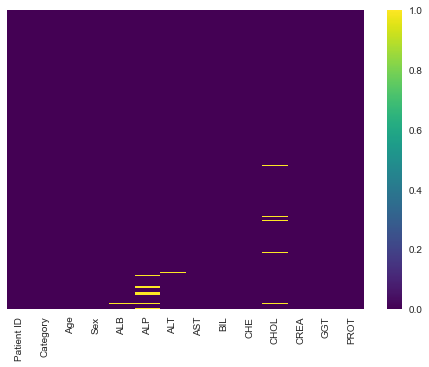

Patient ID     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [8]:
sns.heatmap(HCV.isnull(), cmap = 'viridis')
plt.yticks([])

plt.show()

HCV.isnull().sum()

### ALB, ALP, ALT, CHOL and PROT have missing values in the dataset. To handle the missing values, there are many methods. These methods are:

- Deleting the columns with missing data
- Deleting the rows with missing data
- Filling the missing data with a value – Imputation

I will choose to fill the missing data with the mean of the column.

In [9]:
mean1 = HCV['ALB'].mean()
HCV['ALB'].fillna(value=mean1, inplace=True)

mean2 = HCV['ALP'].mean()
HCV['ALP'].fillna(value=mean2, inplace=True)

mean3 = HCV['ALT'].mean()
HCV['ALT'].fillna(value=mean3, inplace=True)

mean4 = HCV['CHOL'].mean()
HCV['CHOL'].fillna(value=mean4, inplace=True)

mean5 = HCV['PROT'].mean()
HCV['PROT'].fillna(value=mean5, inplace=True)

HCV.isnull().sum()

Patient ID    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

Looks good now!

### Check for duplicate data

In [10]:
duplicate = HCV.duplicated()
print(duplicate.sum())

0


#### No duplicate records in the data.  Let's explore the data more:

### Prinitng the correlation matrix to observe all correlation between features:

<AxesSubplot:>

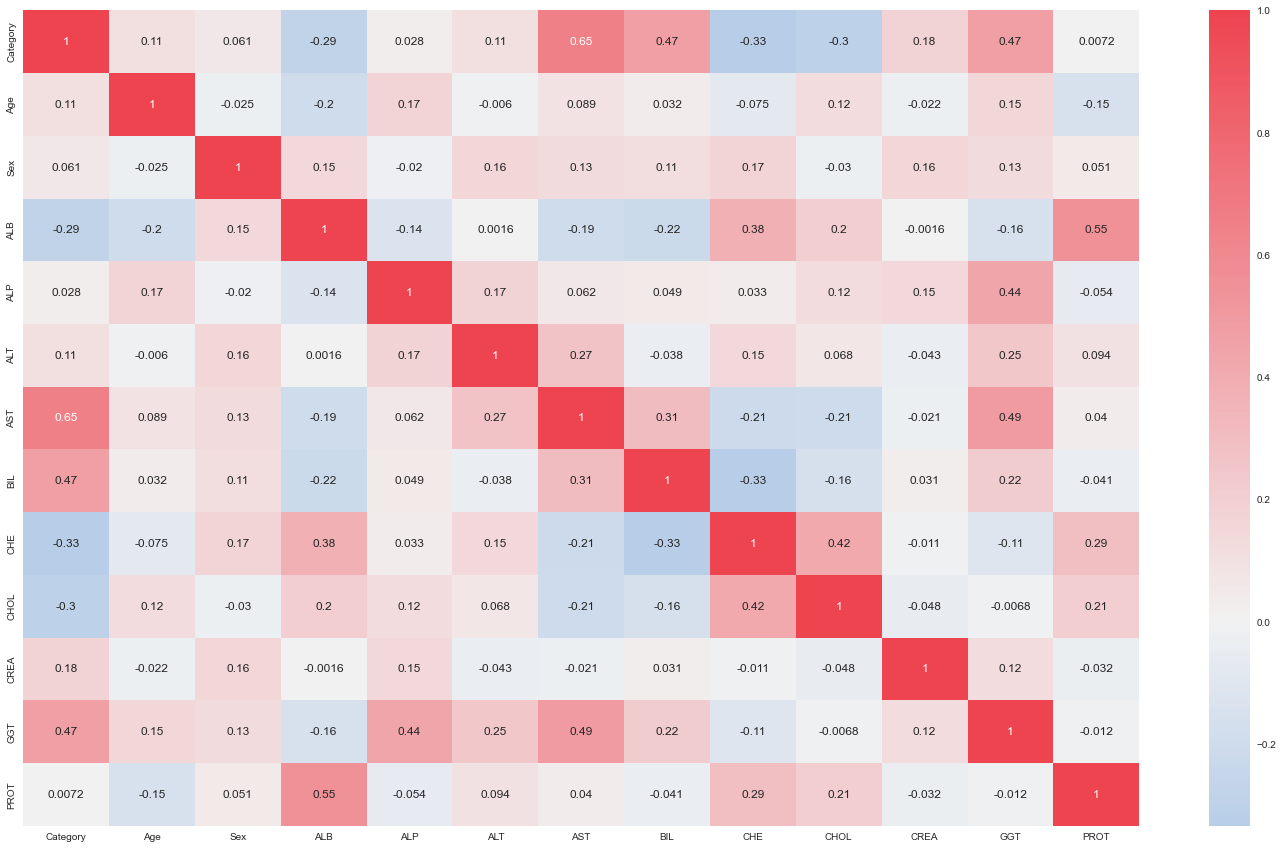

In [11]:
corrmat= HCV.drop(['Patient ID'], axis = 1).corr()
plt.figure(figsize=(25,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

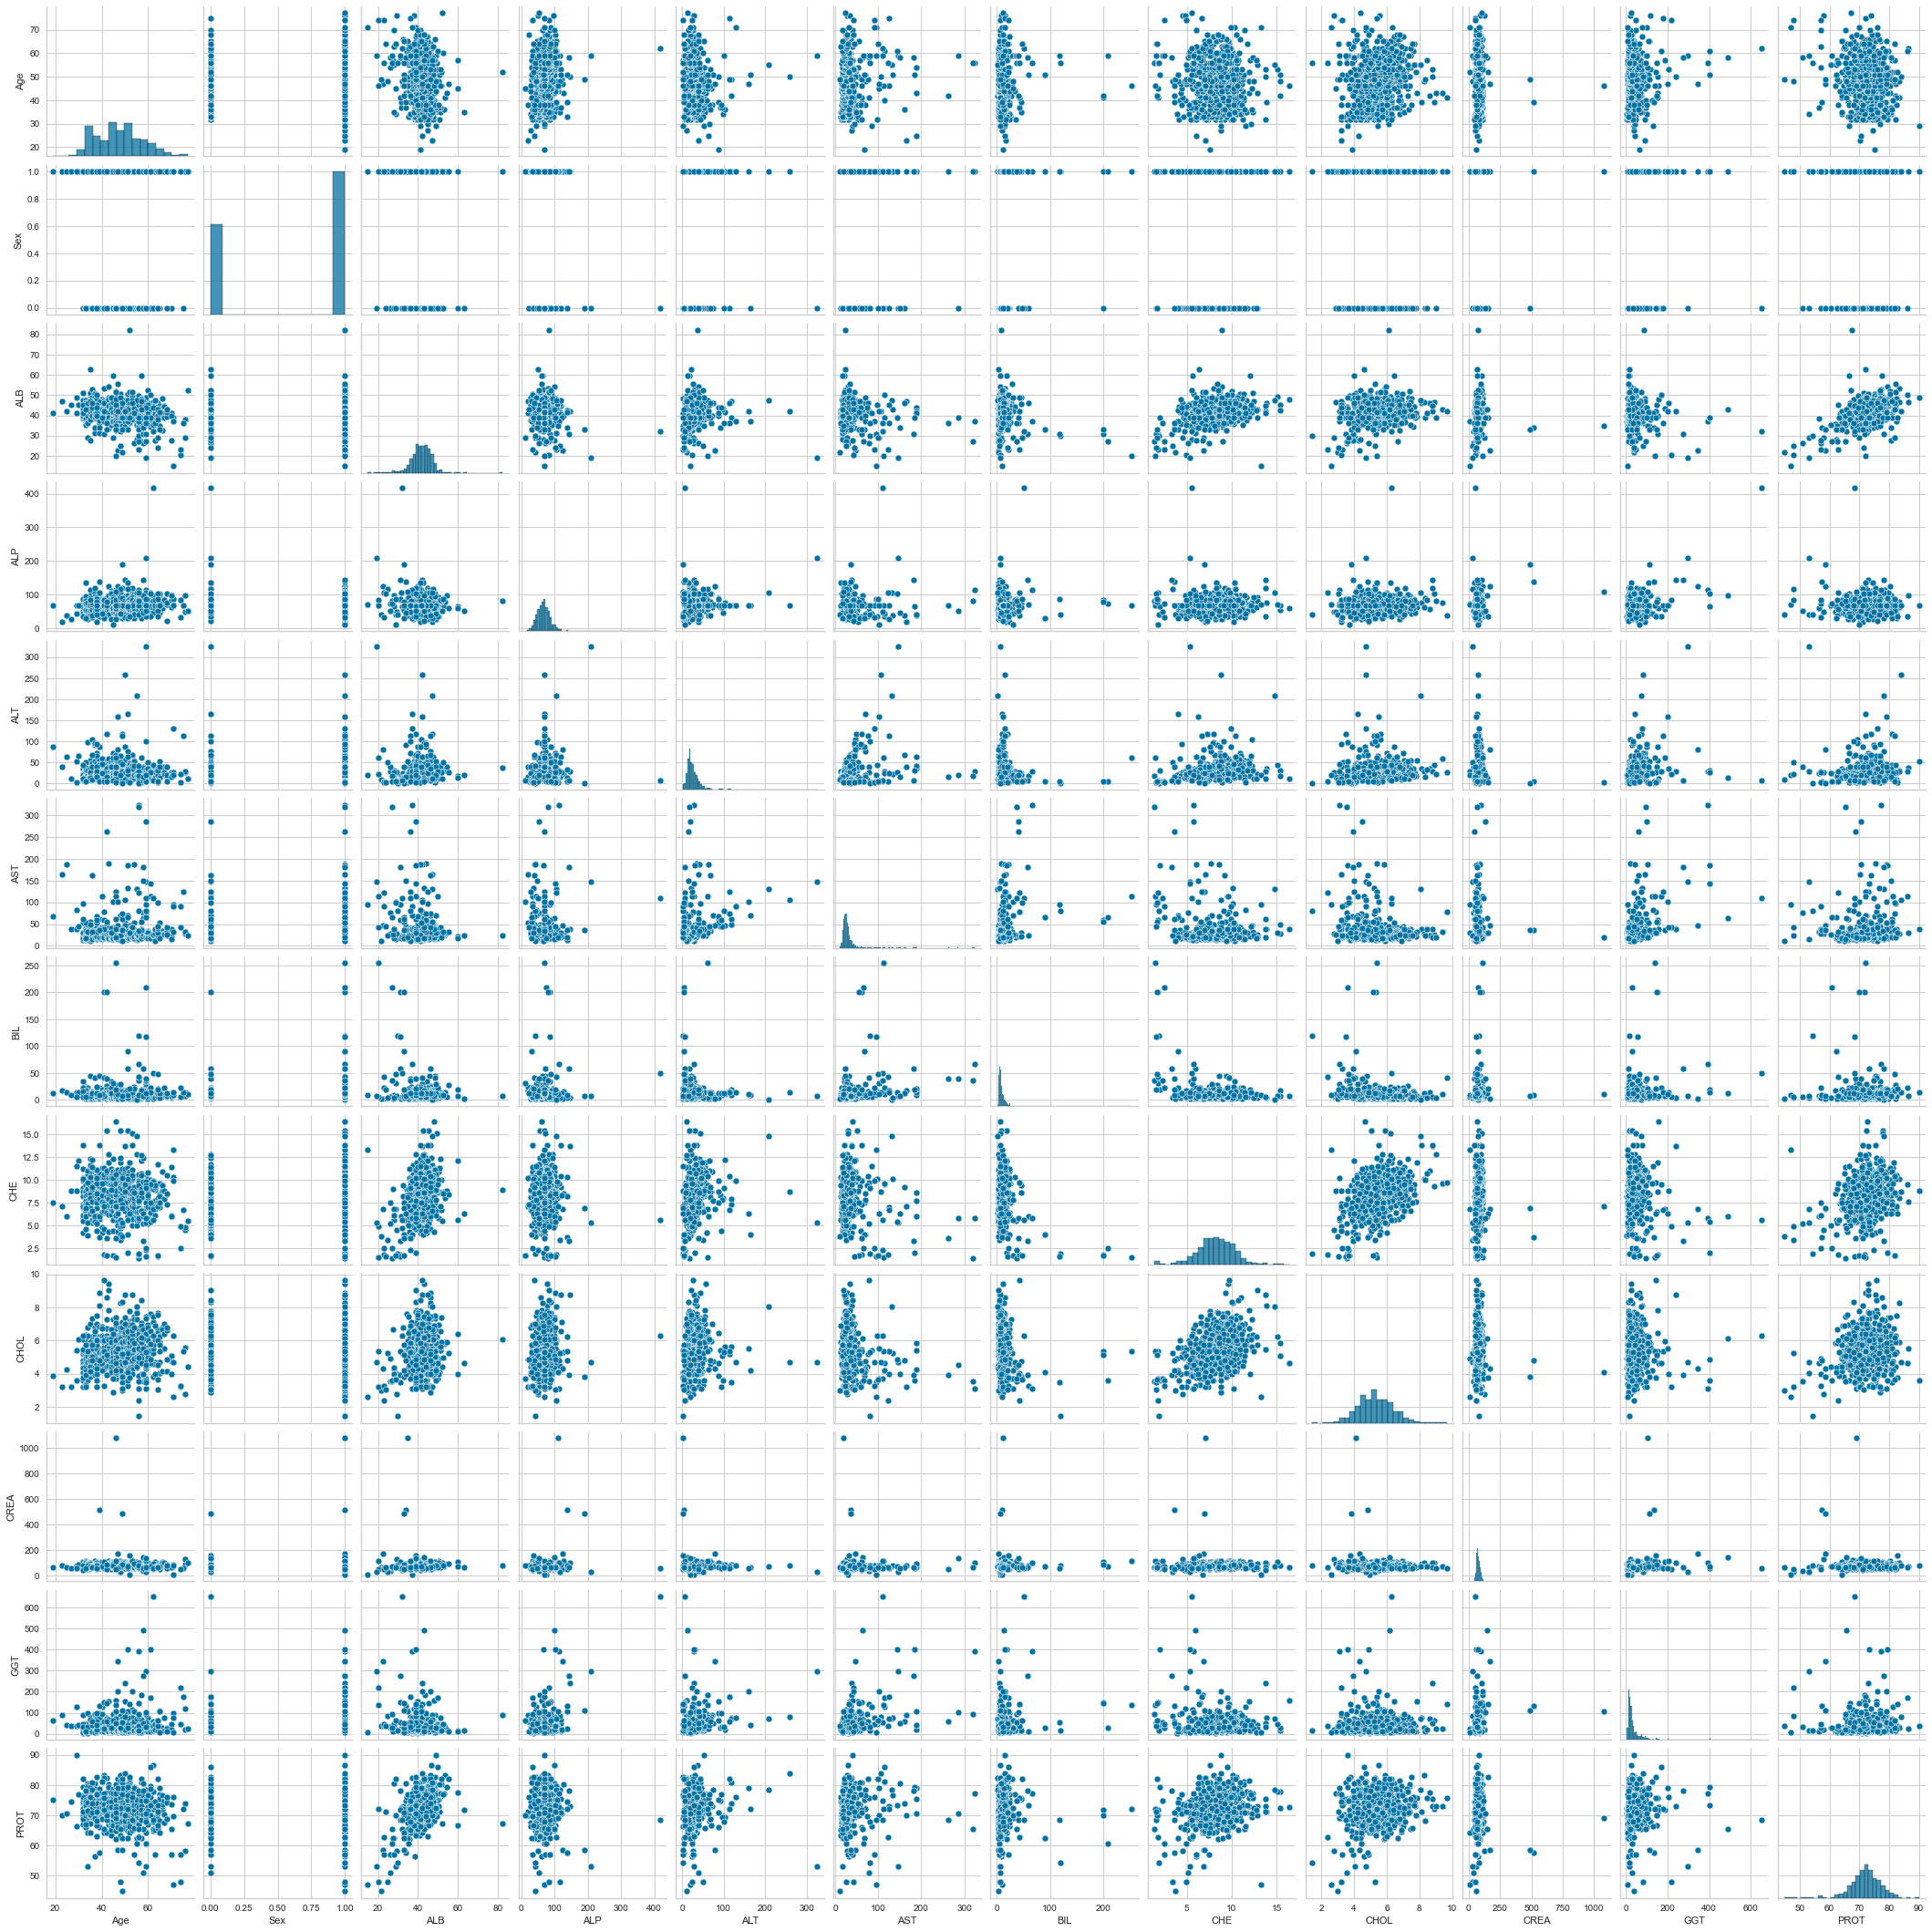

In [12]:
sns.pairplot(HCV.drop(['Patient ID','Category'], axis = 1))

* From the correlation matrix and the pair plot, there is an indication of a slight correlation between PROT and ALB. Overall, there is no highly correlated features in the data.

### Prinitng the correlation between all features and the class:

In [13]:
HCV.drop(['Patient ID'], axis = 1).corr()['Category'].sort_values(ascending = False)

Category    1.000000
AST         0.648341
BIL         0.473006
GGT         0.471164
CREA        0.182040
ALT         0.106369
Age         0.106341
Sex         0.060657
ALP         0.028488
PROT        0.007160
ALB        -0.285467
CHOL       -0.300254
CHE        -0.329472
Name: Category, dtype: float64

* The above output indicated the correlation of some features with the class. AST, BIL and GGT have a positive relationship with the class. The higher these features, the worse the condition of the patient's liver.

## Univariate Analysis of some features:

<AxesSubplot:xlabel='Age'>

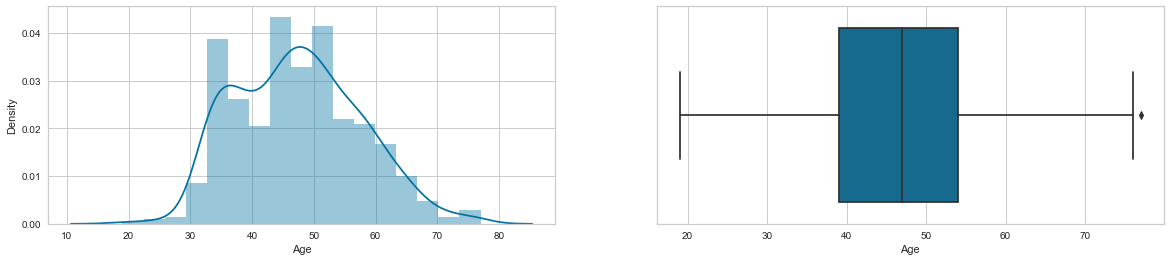

In [14]:
#Univariate analysis of Age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(HCV['Age'])
f.add_subplot(1,2,2)
sns.boxplot(HCV['Age'])

* From the distplot, it can be seen that the density of the data lies in the range of mid 40s to mid 50s and very rarely patients aged 20 years or below or 80 years and above.

<AxesSubplot:xlabel='ALT'>

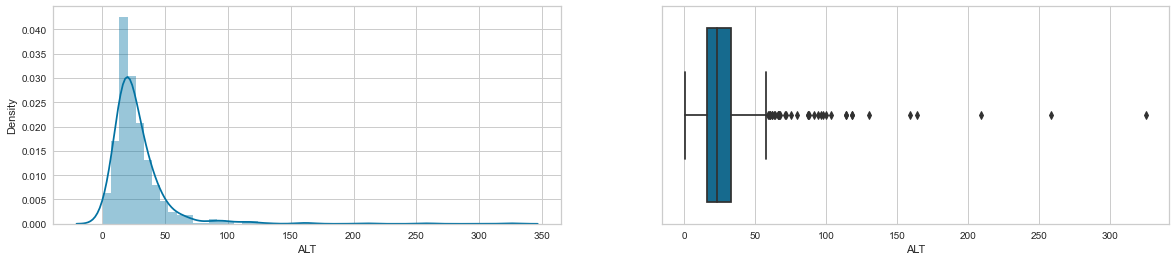

In [15]:
#Univariate analysis of Sex.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(HCV['ALT'])
f.add_subplot(1,2,2)
sns.boxplot(HCV['ALT'])

* Most values of ALT test range between 20-30
* The ALT feature has several outliers

<AxesSubplot:xlabel='PROT'>

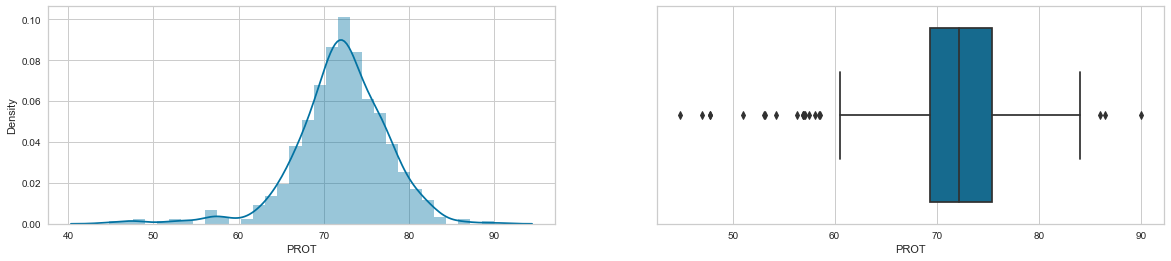

In [16]:
#Univariate analysis of Sex.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(HCV['PROT'])
f.add_subplot(1,2,2)
sns.boxplot(HCV['PROT'])

* Most values of Proteins in the data are around 75.
* PROT feature has several outliers.

<AxesSubplot:xlabel='CHOL'>

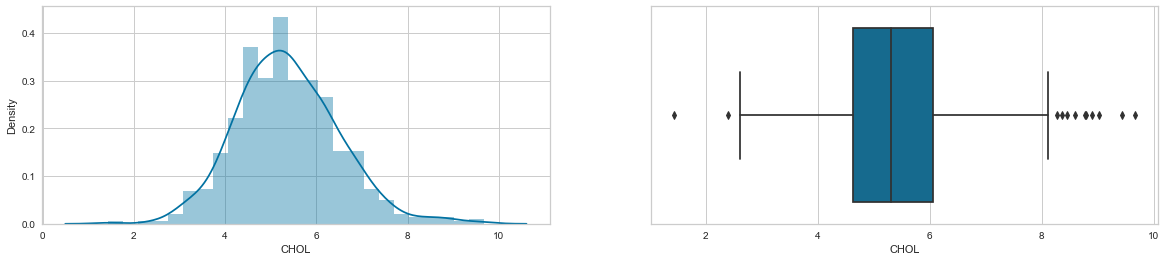

In [17]:
#Univariate analysis of Sex.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(HCV['CHOL'])
f.add_subplot(1,2,2)
sns.boxplot(HCV['CHOL'])

* Mosl cholestrol levels in the data are between 4-6.
* CHOL feature has some outliers

<AxesSubplot:xlabel='GGT'>

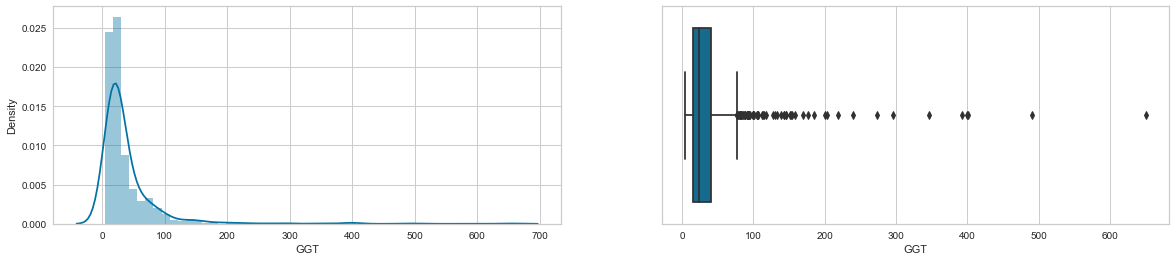

In [18]:
#Univariate analysis of Sex.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(HCV['GGT'])
f.add_subplot(1,2,2)
sns.boxplot(HCV['GGT'])

* The density of GGT in the data lies in the range of 0 to 50
* GGT feature also has some outliers.

### Visualization of Features and their association with the Class using histograms:

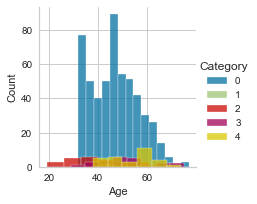

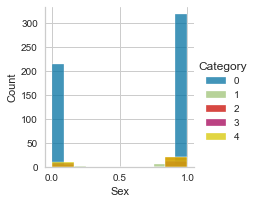

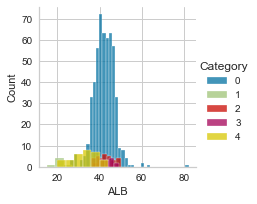

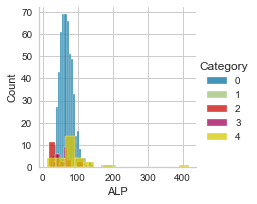

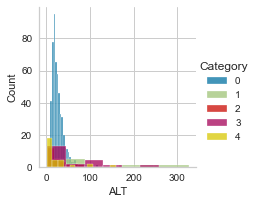

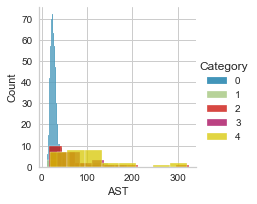

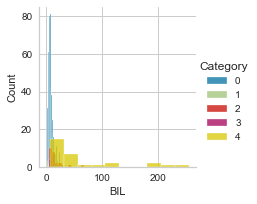

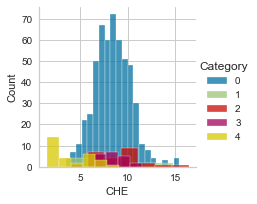

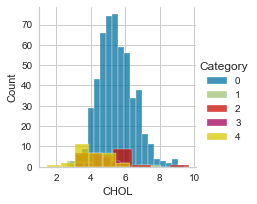

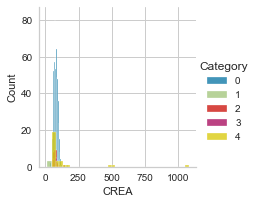

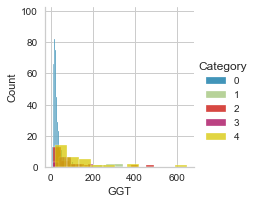

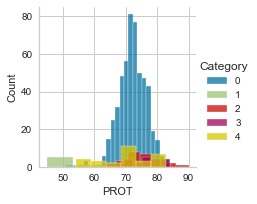

In [19]:
#exploring distribution plot for all features

for i in HCV.drop(['Patient ID'], axis = 1).columns:
    if i == 'Category':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(HCV,hue='Category')\
    .map(sns.histplot,i)\
    .add_legend()
    plt.show()

**Some insights from the above plots:**

- For age, it's clear that most late stages where found in ages 40 and up.
- For gender, we have more male patients with stage 4
- ALB scores were between 20 to 40 for patients with stage 4.
- CHE, CHOL, PROT and ALB have almost the same distribution.

#### let's evaluate the target and find out if our data is imbalanced or not using values counts and count plot:

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

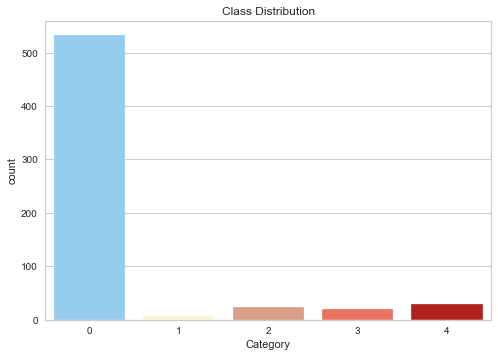

In [20]:
#Counts of classes in data
print(HCV['Category'].value_counts())


colors=["lightskyblue", "lemonchiffon", "darksalmon", "tomato", "r"]
sns.countplot(data= HCV, x="Category",palette=colors)
plt.title('Class Distribution')

##### From the above output and plot, it is clear that a severe imbalance problem appears in the classes. Our models will not offer the best performance with this problem. So, there is a need for sampling to balance the data. I will build all models with the imbalanced data first, then I will compare their performance with the models after fixing the imbalance problem. Now, I will determine the Features and label: 

In [21]:
X = HCV.drop(['Category', 'Patient ID'], axis=1)
Y = HCV['Category']
print(X.shape)
print(Y.shape)

(615, 12)
(615,)


### The following plot will show the ranges of the features:

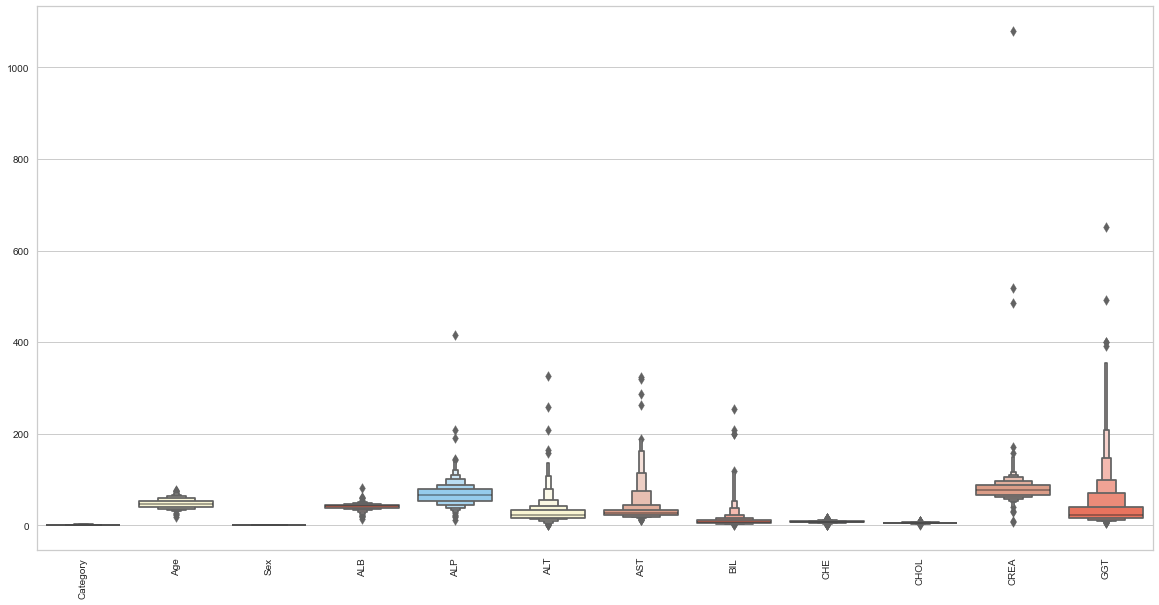

In [22]:
shades =["lightskyblue", "lemonchiffon", "darksalmon", "tomato"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = HCV.drop(['Patient ID'], axis = 1).iloc[:,:-1],palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows how the features have no big difference in  ranges. Therefore, no need to scale the features in this case. Although standardization is subjective, scaling the features to the same range before modeling and testing when needed is extremely important since it affects the performance of the models.

### Scale the features:

In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
scaled_features = scaler.transform(X)

#check whether the normalized features have a mean of zero and a standard deviation of one:
np.mean(scaled_features),np.std(scaled_features)

(5.343512443724331e-17, 0.9999999999999999)

###  Splitting the X and Y into 70% for the Training set and 30% for Testing set:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(430, 12)
(185, 12)
(430,)
(185, 12)


# PART 1

### Bulding the optimized imbalanced models:
* KNN
* GNB
* DT
* RF
* SVM
* MLP

### 1-Imbalanced Optimized KNN

In [25]:
#KNN

parameters_k = {"n_neighbors": range(2, 50)}

knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 10, n_jobs=-1)
knn.fit(X_train, y_train)

print(f'The best model is: {knn.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred1
y_pred1 = knn.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1)
cr1 = classification_report(y_test, y_pred1)

print(f'Accuracy of optimized KNN is: {accuracy1}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized KNN is:\n {cm1}')
print('-----------------------------------------------------')
print(f'Classification report of optimized KNN is:\n {cr1}')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
The best model is: KNeighborsClassifier(n_neighbors=3)
-----------------------------------------------------
Accuracy of optimized KNN is: 0.9081081081081082
-----------------------------------------------------
Confusion matrix of optimized KNN is:
 [[160   0   1   0   0]
 [  2   0   0   0   0]
 [  3   1   2   1   0]
 [  2   0   0   3   1]
 [  3   2   0   1   3]]
-----------------------------------------------------
Classification report of optimized KNN is:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       161
           1       0.00      0.00      0.00         2
           2       0.67      0.29      0.40         7
           3       0.60      0.50      0.55         6
           4       0.75      0.33      0.46         9

    accuracy                           0.91       185
   macro avg       0.59      0.42      0.47       185
weighted avg       0.90      0.91     

### 2-Imbalanced Optimized GNB

In [26]:
#GNB

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100) }

GB = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
GB.fit(X_train, y_train)

print(f'The best model is: {GB.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred2
y_pred2 = GB.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)

print(f'Accuracy of optimized GNB is: {accuracy2}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized GNB is:\n {cm2}')
print('-----------------------------------------------------')
print(f'Classification report of optimized GNB is:\n {cr2}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The best model is: GaussianNB(var_smoothing=8.111308307896872e-05)
-----------------------------------------------------
Accuracy of optimized GNB is: 0.9027027027027027
-----------------------------------------------------
Confusion matrix of optimized GNB is:
 [[153   1   3   3   1]
 [  0   2   0   0   0]
 [  4   0   0   2   1]
 [  2   0   0   4   0]
 [  0   0   0   1   8]]
-----------------------------------------------------
Classification report of optimized GNB is:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       161
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         7
           3       0.40      0.67      0.50         6
           4       0.80      0.89      0.84         9

    accuracy                           0.90       185
   macro avg       0.57      0.70      0.62       185
weighted avg       0.90 

### 3-Imbalanced Optimized DT

In [27]:
#DT

param_grid_DT = {'max_depth': [1, 10, 25, 50, 100, 200, 300],
              'min_samples_leaf': [1, 10, 20, 25],
              'max_leaf_nodes': [1, 25, 50, 100, 200, 300, 400, 500]}

DT = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid_DT, cv=5, n_jobs=-1)
DT.fit(X_train, y_train)

print(f'The best model is: {DT.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred3
y_pred3 = DT.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)

print(f'Accuracy of optimized DT is: {accuracy3}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized DT is:\n {cm3}')
print('-----------------------------------------------------')
print(f'Classification report of optimized DT is:\n {cr3}')

The best model is: DecisionTreeClassifier(criterion='entropy', max_depth=300, max_leaf_nodes=400)
-----------------------------------------------------
Accuracy of optimized DT is: 0.9081081081081082
-----------------------------------------------------
Confusion matrix of optimized DT is:
 [[156   1   1   3   0]
 [  1   0   0   1   0]
 [  1   0   2   3   1]
 [  1   0   2   3   0]
 [  1   0   0   1   7]]
-----------------------------------------------------
Classification report of optimized DT is:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       161
           1       0.00      0.00      0.00         2
           2       0.40      0.29      0.33         7
           3       0.27      0.50      0.35         6
           4       0.88      0.78      0.82         9

    accuracy                           0.91       185
   macro avg       0.50      0.51      0.50       185
weighted avg       0.92      0.91      0.91       185



### 4-Imbalanced Optimized RF

In [28]:
#RF

param_grid_RF = {
'max_depth': [1, 10, 30, 80, 90, 100],
    'max_features': [3, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 11],
    'n_estimators': [100, 200, 300]
}

RF = GridSearchCV(RandomForestClassifier(criterion='entropy'), param_grid_RF, cv = 3, n_jobs = -1, verbose =0)
RF.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 10, 30, 80, 90, 100],
                         'max_features': [3, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 11],
                         'n_estimators': [100, 200, 300]})

In [29]:
print(f'The best model is: {RF.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred4
y_pred4 = RF.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
cm4 = confusion_matrix(y_test, y_pred4)
cr4 = classification_report(y_test, y_pred4)

print(f'Accuracy of optimized RF is: {accuracy4}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized RF is:\n {cm4}')
print('-----------------------------------------------------')
print(f'Classification report of optimized RF is:\n {cr4}')

The best model is: RandomForestClassifier(criterion='entropy', max_depth=90, max_features=5)
-----------------------------------------------------
Accuracy of optimized RF is: 0.9243243243243243
-----------------------------------------------------
Confusion matrix of optimized RF is:
 [[159   0   0   1   1]
 [  1   0   0   1   0]
 [  3   0   1   2   1]
 [  1   0   1   3   1]
 [  0   0   0   1   8]]
-----------------------------------------------------
Classification report of optimized RF is:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.00      0.00      0.00         2
           2       0.50      0.14      0.22         7
           3       0.38      0.50      0.43         6
           4       0.73      0.89      0.80         9

    accuracy                           0.92       185
   macro avg       0.51      0.50      0.49       185
weighted avg       0.91      0.92      0.91       185



### 5-Imbalanced Optimized SVM

In [30]:
#SVM

parameter_gc_SVM = {'C': [.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000],
                    'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

SVM = GridSearchCV(SVC(probability = True), parameter_gc_SVM, refit = True, verbose=0)
SVM.fit(X_train, y_train)

# Testing the model using X_test and storing the output in y_pred5
y_pred5 = SVM.predict(X_test)
print('-----------------------------------------------------')

accuracy5 = accuracy_score(y_test, y_pred5)
cm5 = confusion_matrix(y_test, y_pred5)
cr5 = classification_report(y_test, y_pred5)

print(f'Accuracy of optimized SVM is: {accuracy5}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized SVM is:\n {cm5}')
print('-----------------------------------------------------')
print(f'Classification report of optimized SVM is:\n {cr5}')

-----------------------------------------------------
Accuracy of optimized SVM is: 0.918918918918919
-----------------------------------------------------
Confusion matrix of optimized SVM is:
 [[158   0   1   1   1]
 [  1   0   0   0   1]
 [  3   0   2   1   1]
 [  1   1   1   3   0]
 [  2   0   0   0   7]]
-----------------------------------------------------
Classification report of optimized SVM is:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       161
           1       0.00      0.00      0.00         2
           2       0.50      0.29      0.36         7
           3       0.60      0.50      0.55         6
           4       0.70      0.78      0.74         9

    accuracy                           0.92       185
   macro avg       0.55      0.51      0.52       185
weighted avg       0.91      0.92      0.91       185



### 6-Imbalanced Optimized MLP

In [31]:
#MLP

parameter_gc_MLP = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

MLP = GridSearchCV(MLPClassifier(), parameter_gc_MLP, n_jobs=-1, cv=3)
MLP.fit(X_train, y_train)

/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'identity', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [32]:
# Testing the model using X_test and storing the output in y_pred6
y_pred6 = MLP.predict(X_test)
print('-----------------------------------------------------')

accuracy6 = accuracy_score(y_test, y_pred6)
cm6 = confusion_matrix(y_test, y_pred6)
cr6 = classification_report(y_test, y_pred6)

print(f'Accuracy of optimized MLP is: {accuracy6}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized MLP is:\n {cm6}')
print('-----------------------------------------------------')
print(f'Classification report of optimized MLP is:\n {cr6}')

-----------------------------------------------------
Accuracy of optimized MLP is: 0.9243243243243243
-----------------------------------------------------
Confusion matrix of optimized MLP is:
 [[159   0   1   0   1]
 [  1   0   0   1   0]
 [  3   0   1   1   2]
 [  2   0   0   4   0]
 [  1   1   0   0   7]]
-----------------------------------------------------
Classification report of optimized MLP is:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       161
           1       0.00      0.00      0.00         2
           2       0.50      0.14      0.22         7
           3       0.67      0.67      0.67         6
           4       0.70      0.78      0.74         9

    accuracy                           0.92       185
   macro avg       0.56      0.51      0.52       185
weighted avg       0.91      0.92      0.91       185



## Generating Metrics and different scores for all imbalance models to evaluate their performance:

In [33]:
classifiers=[knn, GB, DT, RF, SVM, MLP]
metrics=['ROC AUC','Cohen Kappa','zero_one_loss','hamming_loss','matthews_corrcoef','accuracy',
         'precision', 'recall', 'f1']
Scores_A=pd.DataFrame(index=metrics,columns=['KNN', 'GB', 'DT', 'RF', 'SVM', 'MLP'])

for i in range(0,len(classifiers)):
    cls=classifiers[i]
    y_pred=cls.predict(X_test)
    y_pred_proba=cls.predict_proba(X_test)
    cm = confusion_matrix(y_test,y_pred)
    scores=[round(roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted'),4),
     round(cohen_kappa_score(y_test,y_pred),4),
     round(zero_one_loss(y_test,y_pred),4),
     round(hamming_loss(y_test,y_pred),4),
     round(matthews_corrcoef(y_test,y_pred),4),
     round(accuracy_score(y_test,y_pred),4),
     round(precision_score(y_test, y_pred, average='weighted'),4),
     round(recall_score(y_test, y_pred,average='weighted'),4),
     round(f1_score(y_test, y_pred, average='weighted'),4)]
    Scores_A.iloc[:,i]=scores

display(Scores_A)

,KNN,GB,DT,RF,SVM,MLP
ROC AUC,0.7993,0.9545,0.7693,0.9792,0.9397,0.9308
Cohen Kappa,0.5349,0.6059,0.6206,0.6619,0.6305,0.6480
zero_one_loss,0.0919,0.0973,0.0919,0.0757,0.0811,0.0757
hamming_loss,0.0919,0.0973,0.0919,0.0757,0.0811,0.0757
matthews_corrcoef,0.5527,0.6076,0.6219,0.6653,0.6340,0.6542
accuracy,0.9081,0.9027,0.9081,0.9243,0.9189,0.9243
precision,0.9002,0.8965,0.9151,0.9102,0.9058,0.9082
recall,0.9081,0.9027,0.9081,0.9243,0.9189,0.9243
f1,0.8966,0.8980,0.9100,0.9128,0.9109,0.9122


## Interpreting the results:

* Optimization of the k nearest neighbor model consisted of optimizing the number of K. The overall proportion of correctly classified observations in the optimized k nearest neighbor is high (91%) regardless of the imbalance problem. The model performed well on classifying class 0 since it's the highest in the data. Additionally, the model performed poorly on classifying class 2, 3 and 4 with 40%,55%, 46% F1 score respectively. None of class 1 wass correctly classified due to the very small observations from this class. Macro average was 47% and this is low also due to the imbalance problem.

* Optimization of the Gaussian Naive Bayes model consisted of optimizing the  var smoothing parameter. The accuracy of Gaussian Naive Bayes model was high as well (90%). The model performed better than the KNN in classifying classes 0,1,3, and 4 which results in a higher macro average (the average of all F1 scores). However, unlike KNN, the model failed on classifying class 2 at all. GNB macro average is 62% and it's better than KNN.

* Optimization of the Decision tree model consisted of optimizing the max depth, min samples leaf, and max leaf nodes parameters. Decision tree model performance was in between the KNN and GNB with 91% accuracy. Accuracy was pretty high as well. DT misclassified class 1 100% of the time (same as KNN) but it performed well on class 4 with 82% F1 score. Overall performance of DT was very close to the KNN. This will be checked after solving the imbalance problem.

* Optimization of the Random forest model consisted of optimizing the max depth, max features, min samples leaf, min samples split, and number of estimators parameters.The random forest classifier failed to identify class 1 at all while performed badly on class 2 and 3. However, class 4 was highly classified in RF, GNB and DT with around 80% F1 score. Overall accuracy was 92%.

* Optimization of the Support vector machine model consisted of optimizing the C range, gamma, and kernel parameters. Support vector machine classifier has similar performance like the RF model which are the highest models comparing them with the previous models. It produced a 92% accuracy with 52% macro average. It did miss class 1, and other classes such as 2,3 were not highly distinguished with 36% and 55% F1 score respectively.

* Optimization of the multi-layer perceptron consisted of optimizing the hidden layer sizes, activation, solver, alpha and learning_rate parameters. MLP classifier also performed like the RF and SVM with 92% accuracy rate, and 100% misclassifying class 1. Class 2 was poorly classified by MLP with only 22% F1 score. Classes 3 and 4 were fairly well classified with more than 50% F1 score.

### Interpreting the metrics:

* ROC AUC is a probability curve and area under the curve that represents how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at correctly predicting all classes. The above table shows that RF had the highest ROC AUC score followed by SVM then GNB. KNN had the lowest ROC AUC.

* Cohen kappa score tells us how much better our model is performing over the performance of a model that simply guesses at random according to the frequency of each class. The higher, the better. All model gor around 60% cohen kappa scores except for the KNN with 53% cohen kappa score. After solving the imbalanced data, this score is expected to increase in all models.

* Zero-one loss metric determines the error between the actual class and the predicted value. It returns 1 when the actual and predicted are not equal and zero otherwise. Closer to zero is better. From the table, all models had small values of loss. 

* Hamming loss is the fraction of wrong classes to the total number of classes. All models had around 0.08 or 0.09 hamming loss scores. Zero-one loss and Hamming loss score are expected to be lower when the data is balanced.

* matthews corrcoef is also a model evaluation metric that measures the differences between actual values and predicted values. It will be high when all (tp, fp, tn, fn) rates are good, and low otherwise which means the predictions are random. All models obtained almost 0.5 and 0.6 MCC which is not bad, but also not a good score.

* All models accuracy, recall, weighted avg and precision scores are between 88% to 92%. However, it is noticeable that macro avg score on all models was overly small due to the imbalanced data which led to misclassifying some classes. Based on all the metrics, I can conclude this part by saying KNN and GNB models were the worst in this classification problem.

## ROC AUC Curve visualization for all imbalance models:

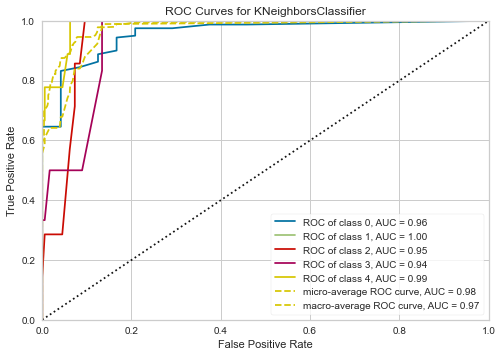

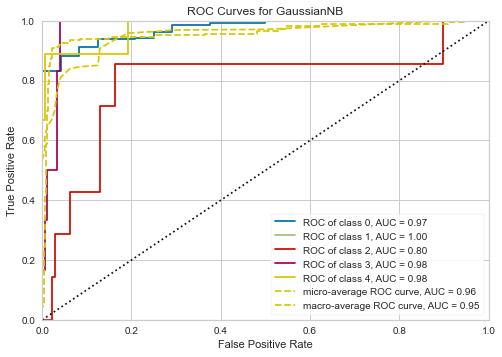

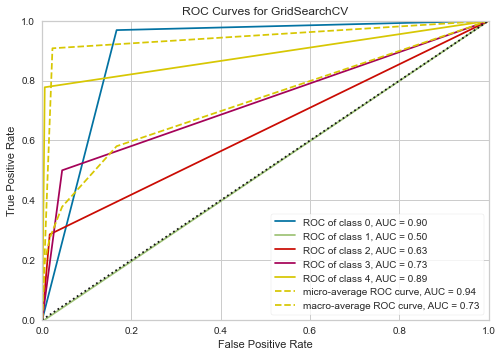

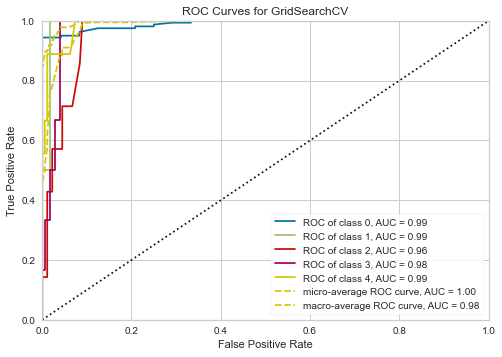

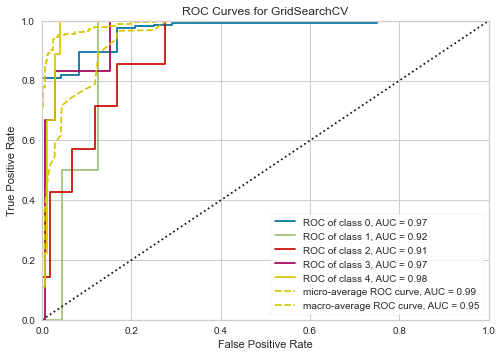

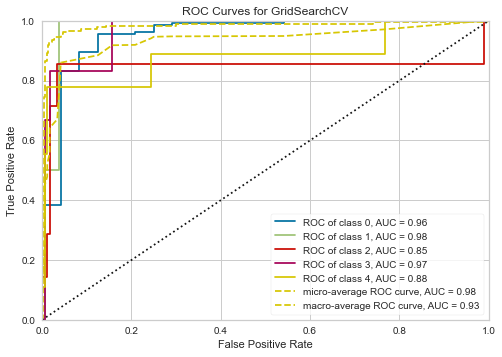

In [56]:
classifiers=[knn, GB, DT, RF, SVM, MLP]
classes = [0,1,2,3,4]
names=['KNN', 'GB', 'DT', 'RF', 'SVM', 'MLP']

def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test) 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)
        
visualization =[ROC_viz()]

* In ROC AUC plots, the higher the curves, the better the model in correctly classifying the true positive class in the dataset. From the ROC AUC curves of the imbalanced models, we can see how almost all models have a low curve of class 2 (red).

# PART 2

### Balancing the data Using random over sampler and Bulding the optimized models:
* Balanced KNN
* Balanced GNB
* Balanced DT
* Balanced RF
* Balanced SVM
* Balanced MLP

In [35]:
#Balancing the data

sampler = RandomOverSampler(random_state=0)

X_resampled, y_resampled = sampler.fit_resample(X, Y)
print(y_resampled.value_counts())

0    533
1    533
2    533
3    533
4    533
Name: Category, dtype: int64


###  Splitting the X and Y into 70% for the Training set and 30% for Testing set:

In [36]:
from sklearn.model_selection import train_test_split
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0, stratify=y_resampled)

print(X_trainb.shape)
print(X_testb.shape)
print(y_trainb.shape)
print(X_testb.shape)

(1865, 12)
(800, 12)
(1865,)
(800, 12)


### 1-Balanced Optimized KNN

In [37]:
#KNN balanced

parameters_k = {"n_neighbors": range(3, 55)}

knnb = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 10, n_jobs=-1)
knnb.fit(X_trainb, y_trainb)

print(f'The best model is: {knnb.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred1b
y_pred1b = knnb.predict(X_testb)

accuracy1b = accuracy_score(y_testb, y_pred1b)
cm1b = confusion_matrix(y_testb, y_pred1b)
cr1b = classification_report(y_testb, y_pred1b)

print(f'Accuracy of optimized balanced KNN is: {accuracy1b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized balanced KNN is:\n {cm1b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized balanced KNN is:\n {cr1b}')

Fitting 10 folds for each of 52 candidates, totalling 520 fits
The best model is: KNeighborsClassifier(n_neighbors=3)
-----------------------------------------------------
Accuracy of optimized balanced KNN is: 0.9925
-----------------------------------------------------
Confusion matrix of optimized balanced KNN is:
 [[154   0   2   2   2]
 [  0 160   0   0   0]
 [  0   0 160   0   0]
 [  0   0   0 160   0]
 [  0   0   0   0 160]]
-----------------------------------------------------
Classification report of optimized balanced KNN is:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           1       1.00      1.00      1.00       160
           2       0.99      1.00      0.99       160
           3       0.99      1.00      0.99       160
           4       0.99      1.00      0.99       160

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99

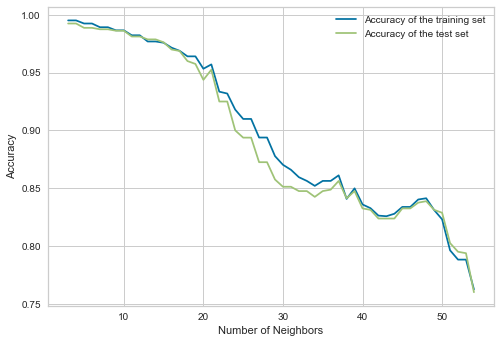

In [38]:
#Plotting the training and testing accuracy of the optimized balanced model:

knntraining_accuracy = []
knntest_accuracy = []

neighbors_setting = range(3,55)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_trainb,y_trainb)
    knntraining_accuracy.append(knn.score(X_trainb, y_trainb))
    knntest_accuracy.append(knn.score(X_testb, y_testb))
 
plt.plot(neighbors_setting,knntraining_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,knntest_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
#by looking at plot, best result accurs when n_neighbors is 1, but to avoid overfitting,
#I decided to choose the range to start from k = 3. The highest accuracy for training and testing occur when k is lower than 10.

### 2-Balanced Optimized GNB

In [39]:
#GNB balanced

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100) }

GBb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
GBb.fit(X_trainb, y_trainb)

print(f'The best model is: {GBb.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred2b
y_pred2b = GBb.predict(X_testb)

accuracy2b = accuracy_score(y_testb, y_pred2b)
cm2b = confusion_matrix(y_testb, y_pred2b)
cr2b = classification_report(y_testb, y_pred2b)

print(f'Accuracy of optimized balanced GNB is: {accuracy2b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized balanced GNB is:\n {cm2b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized balanced GNB is:\n {cr2b}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The best model is: GaussianNB(var_smoothing=2.310129700083158e-07)
-----------------------------------------------------
Accuracy of optimized balanced GNB is: 0.79
-----------------------------------------------------
Confusion matrix of optimized balanced GNB is:
 [[150   1   6   3   0]
 [  0 160   0   0   0]
 [ 55   0  76  16  13]
 [ 19   0  29 112   0]
 [  0   0   0  26 134]]
-----------------------------------------------------
Classification report of optimized balanced GNB is:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78       160
           1       0.99      1.00      1.00       160
           2       0.68      0.47      0.56       160
           3       0.71      0.70      0.71       160
           4       0.91      0.84      0.87       160

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.78       800
weighted av

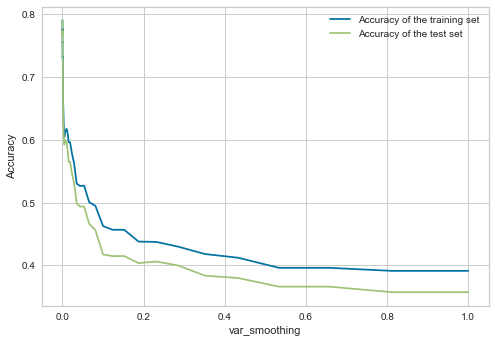

In [40]:
#Plotting the training and testing accuracy of the optimized balanced model:

GBtraining_accuracy = []
GBtest_accuracy = []

var_smoothing_setting = np.logspace(0,-9, num=100)

for var_smoothing in var_smoothing_setting:
    GB = GaussianNB(var_smoothing=var_smoothing)
    GB.fit(X_trainb,y_trainb)
    GBtraining_accuracy.append(GB.score(X_trainb, y_trainb))
    GBtest_accuracy.append(GB.score(X_testb, y_testb))
 
plt.plot(var_smoothing_setting,GBtraining_accuracy, label='Accuracy of the training set')
plt.plot(var_smoothing_setting,GBtest_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('var_smoothing')
plt.legend()

### 3-Balanced Optimized DT

In [41]:
#DT balanced

param_grid_DT = {'max_depth': [1, 10, 25, 50, 100, 200, 300],
              'min_samples_leaf': [1, 10, 20, 25],
              'max_leaf_nodes': [1, 25, 50, 100, 200, 300, 400, 500]}

DTb = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid_DT, cv=5, n_jobs=-1)
DTb.fit(X_trainb, y_trainb)

print(f'The best model is: {DTb.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred3b
y_pred3b = DTb.predict(X_testb)

accuracy3b = accuracy_score(y_testb, y_pred3b)
cm3b = confusion_matrix(y_testb, y_pred3b)
cr3b = classification_report(y_testb, y_pred3b)

print(f'Accuracy of optimized balanced DT is: {accuracy3b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized balanced DT is:\n {cm3b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized balanced DT is:\n {cr3b}')

The best model is: DecisionTreeClassifier(criterion='entropy', max_depth=200, max_leaf_nodes=400)
-----------------------------------------------------
Accuracy of optimized balanced DT is: 0.9875
-----------------------------------------------------
Confusion matrix of optimized balanced DT is:
 [[150   0   5   4   1]
 [  0 160   0   0   0]
 [  0   0 160   0   0]
 [  0   0   0 160   0]
 [  0   0   0   0 160]]
-----------------------------------------------------
Classification report of optimized balanced DT is:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       160
           1       1.00      1.00      1.00       160
           2       0.97      1.00      0.98       160
           3       0.98      1.00      0.99       160
           4       0.99      1.00      1.00       160

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99   

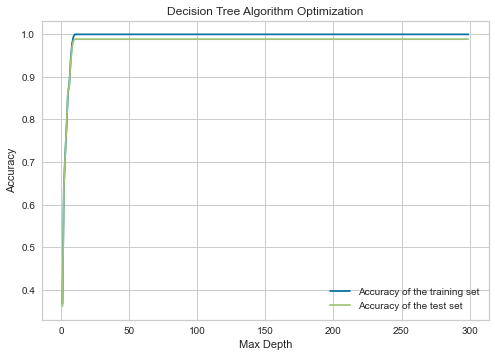

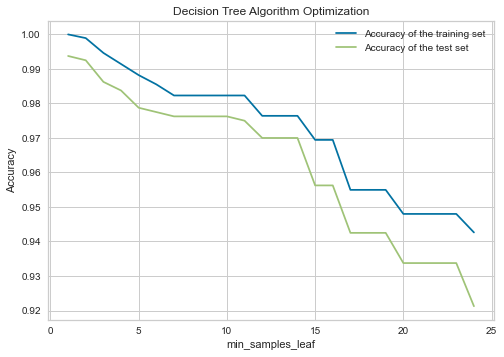

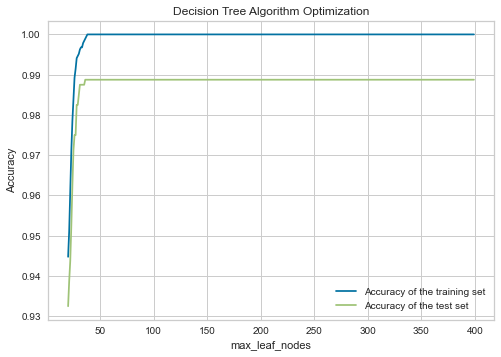

In [42]:
#Plotting the training and testing accuracy of the optimized balanced model:

training_accuracy_depth = []
test_accuracy_depth = []

max_dep = range(1,300)

for md in max_dep:
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=md,random_state=0)
    tree.fit(X_trainb,y_trainb)
    training_accuracy_depth.append(tree.score(X_trainb, y_trainb))
    test_accuracy_depth.append(tree.score(X_testb, y_testb))

plt.plot(max_dep,training_accuracy_depth, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy_depth, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.title('Decision Tree Algorithm Optimization')
plt.show()


######

training_accuracy_leaf = []
test_accuracy_leaf = []

max_leaf = range(1,25)

for ml in max_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=ml,random_state=0)
    tree.fit(X_trainb,y_trainb)
    training_accuracy_leaf.append(tree.score(X_trainb, y_trainb))
    test_accuracy_leaf.append(tree.score(X_testb, y_testb))

plt.plot(max_leaf,training_accuracy_leaf, label='Accuracy of the training set')
plt.plot(max_leaf,test_accuracy_leaf, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()
plt.title('Decision Tree Algorithm Optimization')
plt.show()


#######
training_accuracy_nodes = []
test_accuracy_nodes = []

max_nodes = range(20,400)

for mn in max_nodes:
    tree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=mn,random_state=0)
    tree.fit(X_trainb,y_trainb)
    training_accuracy_nodes.append(tree.score(X_trainb, y_trainb))
    test_accuracy_nodes.append(tree.score(X_testb, y_testb))

plt.plot(max_nodes,training_accuracy_nodes, label='Accuracy of the training set')
plt.plot(max_nodes,test_accuracy_nodes, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('max_leaf_nodes')
plt.legend()
plt.title('Decision Tree Algorithm Optimization')
plt.show()

### 4-Balanced Optimized RF

In [43]:
#RF balanced

param_grid_RF = {
    'max_depth': [1, 10, 30, 80, 90, 100],
    'max_features': [3, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 11],
    'n_estimators': [100, 200, 300]
}

RFb = GridSearchCV(RandomForestClassifier(criterion='entropy'), param_grid_RF, cv = 3, n_jobs = -1, verbose =0)
RFb.fit(X_trainb, y_trainb)

GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 10, 30, 80, 90, 100],
                         'max_features': [3, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 11],
                         'n_estimators': [100, 200, 300]})

In [44]:
print(f'The best model is: {RFb.best_estimator_}')
print('-----------------------------------------------------')

# Testing the model using X_test and storing the output in y_pred4b
y_pred4b = RFb.predict(X_testb)

accuracy4b = accuracy_score(y_testb, y_pred4b)
cm4b = confusion_matrix(y_testb, y_pred4b)
cr4b = classification_report(y_testb, y_pred4b)

print(f'Accuracy of optimized balanced RF is: {accuracy4b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized balanced RF is:\n {cm4b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized balanced RF is:\n {cr4b}')

The best model is: RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3)
-----------------------------------------------------
Accuracy of optimized balanced RF is: 0.9975
-----------------------------------------------------
Confusion matrix of optimized balanced RF is:
 [[158   1   1   0   0]
 [  0 160   0   0   0]
 [  0   0 160   0   0]
 [  0   0   0 160   0]
 [  0   0   0   0 160]]
-----------------------------------------------------
Classification report of optimized balanced RF is:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       160
           1       0.99      1.00      1.00       160
           2       0.99      1.00      1.00       160
           3       1.00      1.00      1.00       160
           4       1.00      1.00      1.00       160

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       8

### 5-Balanced Optimized SVM

In [45]:
#SVM balanced

parameter_gc_SVM = {'C': [.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000],
                    'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

SVMb = GridSearchCV(SVC(probability = True), parameter_gc_SVM, refit = True, verbose=0)
SVMb.fit(X_trainb, y_trainb)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [46]:
print(f'The best model is: {SVMb.best_estimator_}')
print('-----------------------------------------------------')


# Testing the model using X_test and storing the output in y_pred5b
y_pred5b = SVMb.predict(X_testb)
print('-----------------------------------------------------')

accuracy5b = accuracy_score(y_testb, y_pred5b)
cm5b = confusion_matrix(y_testb, y_pred5b)
cr5b = classification_report(y_testb, y_pred5b)

print(f'Accuracy of optimized balanced SVM is: {accuracy5b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized balanced SVM is:\n {cm5b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized balanced SVM is:\n {cr5b}')

The best model is: SVC(C=1, gamma=0.01, probability=True)
-----------------------------------------------------
-----------------------------------------------------
Accuracy of optimized balanced SVM is: 1.0
-----------------------------------------------------
Confusion matrix of optimized balanced SVM is:
 [[160   0   0   0   0]
 [  0 160   0   0   0]
 [  0   0 160   0   0]
 [  0   0   0 160   0]
 [  0   0   0   0 160]]
-----------------------------------------------------
Classification report of optimized balanced SVM is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       160
           4       1.00      1.00      1.00       160

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.0

### 6-Balanced Optimized MLP

In [47]:
#MLP Balanced

parameter_gc_MLPb = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

MLPb = GridSearchCV(MLPClassifier(), parameter_gc_MLPb, n_jobs=-1, cv=3)
MLPb.fit(X_trainb, y_trainb)

/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawsanawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'identity', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [48]:
# Testing the model using X_test and storing the output in y_pred6b
y_pred6b = MLPb.predict(X_testb)
print('-----------------------------------------------------')

accuracy6b = accuracy_score(y_testb, y_pred6b)
cm6b = confusion_matrix(y_testb, y_pred6b)
cr6b = classification_report(y_testb, y_pred6b)

print(f'Accuracy of optimized Balanced MLP is: {accuracy6b}')
print('-----------------------------------------------------')
print(f'Confusion matrix of optimized Balanced MLP is:\n {cm6b}')
print('-----------------------------------------------------')
print(f'Classification report of optimized Balanced MLP is:\n {cr6b}')

-----------------------------------------------------
Accuracy of optimized Balanced MLP is: 0.99625
-----------------------------------------------------
Confusion matrix of optimized Balanced MLP is:
 [[157   1   0   2   0]
 [  0 160   0   0   0]
 [  0   0 160   0   0]
 [  0   0   0 160   0]
 [  0   0   0   0 160]]
-----------------------------------------------------
Classification report of optimized Balanced MLP is:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       160
           1       0.99      1.00      1.00       160
           2       1.00      1.00      1.00       160
           3       0.99      1.00      0.99       160
           4       1.00      1.00      1.00       160

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



## Generating Metrics and different scores for all ibalanced models to evaluate their performance:

In [49]:
classifiers=[knnb, GBb, DTb, RFb, SVMb, MLPb]
metrics=['ROC AUC','Cohen Kappa','zero_one_loss','hamming_loss','matthews_corrcoef','accuracy',
         'precision', 'recall', 'f1']
Scores_A=pd.DataFrame(index=metrics,columns=['KNN balanced', 'GB balanced', 'DT balanced',
                                             'RF balanced', 'SVM balanced', 'MLP Balanced'])

for i in range(0,len(classifiers)):
    cls=classifiers[i]
    y_pred=cls.predict(X_testb)
    y_pred_proba=cls.predict_proba(X_testb)
    cm = confusion_matrix(y_testb,y_pred)
    scores=[round(roc_auc_score(y_testb, y_pred_proba, multi_class='ovo', average='weighted'),4),
     round(cohen_kappa_score(y_testb,y_pred),4),
     round(zero_one_loss(y_testb,y_pred),4),
     round(hamming_loss(y_testb,y_pred),4),
     round(matthews_corrcoef(y_testb,y_pred),4),
     round(accuracy_score(y_testb,y_pred),4),
     round(precision_score(y_testb, y_pred, average='weighted'),4),
     round(recall_score(y_testb, y_pred,average='weighted'),4),
     round(f1_score(y_testb, y_pred, average='weighted'),4)]
    Scores_A.iloc[:,i]=scores

display(Scores_A)

,KNN balanced,GB balanced,DT balanced,RF balanced,SVM balanced,MLP Balanced
ROC AUC,0.9984,0.9447,0.9922,1.0000,1.0,1.0000
Cohen Kappa,0.9906,0.7375,0.9844,0.9969,1.0,0.9953
zero_one_loss,0.0075,0.2100,0.0125,0.0025,0.0,0.0038
hamming_loss,0.0075,0.2100,0.0125,0.0025,0.0,0.0038
matthews_corrcoef,0.9907,0.7424,0.9845,0.9969,1.0,0.9953
accuracy,0.9925,0.7900,0.9875,0.9975,1.0,0.9962
precision,0.9926,0.7946,0.9878,0.9975,1.0,0.9963
recall,0.9925,0.7900,0.9875,0.9975,1.0,0.9962
f1,0.9925,0.7837,0.9874,0.9975,1.0,0.9962


## Interpreting the results:

* I used Random Over Sampler method to resample the data and I got all classes with 533 samples. Then I refit all models again to see how the performance will improve.

* KNN almost correctly classified all classes with 99% accuracy rate which is perfect! And that means the model is able to distinguish all classes equally and easily with no errors.

* Unlike the KNN, GNB did not imporve at all. In fact it got worse and the accuracy decreased from 90% to 79%. However, the macro average increased from 62% to 78% and that's because the model did not miss any class this time. Overall, GNB is not the best model either before or after balancing.

* DT is increased from 91% accuracy to 99% and this is also perferct!

* RF, SVM and MLP are the three models that got a 100% accuracy in this classification problem! Their ability to classify all classes increased from aroud 92% to 100%. This will be reflected on the metrics which I believe all will get better than part 1.

### Interpreting the metrics:

* The above table shows that all models ROC AUC score increased to 99% or 100%. It is noticeable how KNN and DT had a low score before, but they dramatically increased to be almost 100%.

* As expected, Cohen kappa score also is highly increased in all models after solving the imbalanced data from 0.6 to almost 1.0 except for th GNB. It only increased to 0.73 which gives us an idea about the low performance of the GNB in this case.

* As expected, Zero-one loss and Hamming loss errors scores decreased and became very close to zero in all model except for the GNB,  these two scores were around 0.09 before balancing, while after balancing they became 0.2. This also indicates that GNB is not a good model for this problem.

* All models obtained almost 1.0 matthews corrcoef, except for the GNB, it was increased to only 0.74.

* All models (except GNB) accuracy, recall, weighted avg and precision scores are very close to 100%. It is noticeable that macro avg score on all models was dramatically changed to be perfect due to fixing the imbalanced data which led to increase the capability of all models to distinguish between all classes.

* Best model for this problem so far is Support vector Machine with all perfect metrics values.

## ROC AUC Curve visualization for all imbalance models:

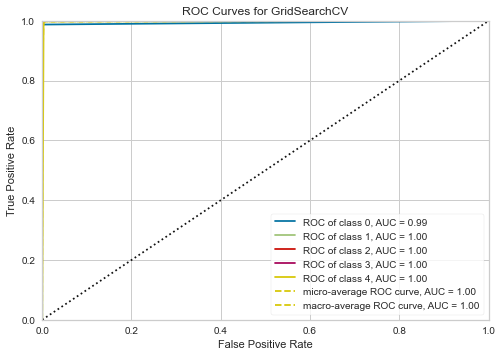

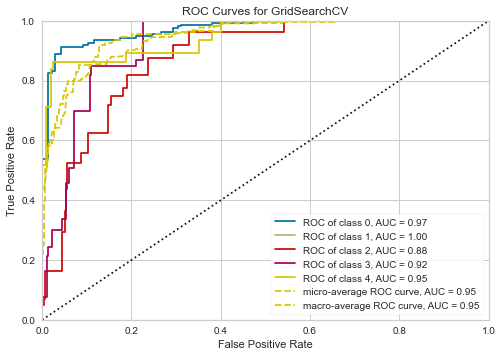

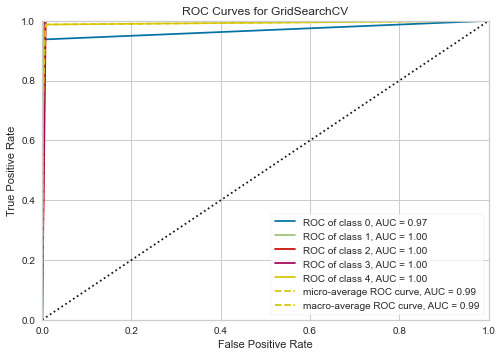

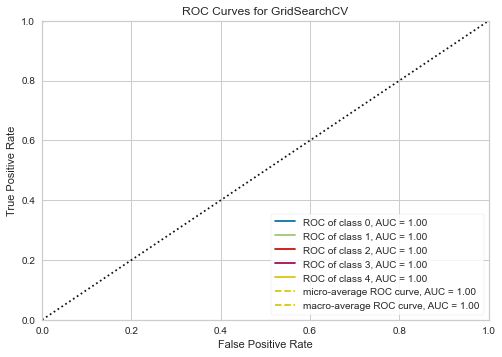

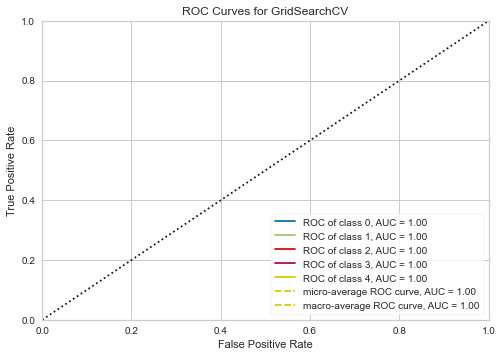

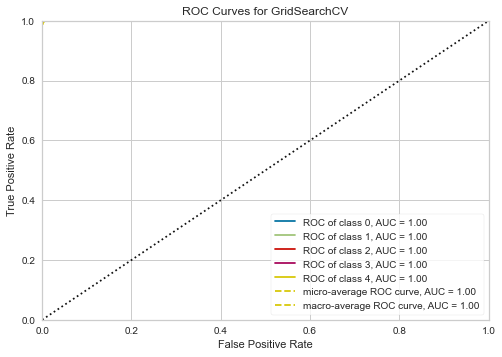

In [50]:
classifiers=[knnb, GBb, DTb, RFb, SVMb, MLPb]
classes = [0,1,2,3,4]
names=['KNN balanced', 'GB balanced', 'DT balanced', 'RF balanced', 'SVM balanced', 'MLP balanced']

def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_trainb, y_trainb)
        visualizer.score(X_testb, y_testb) 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)
        
visualization =[ROC_viz()]

* By looking at the ROC AUC plots and comparing them with the previous ones, we can see how all of the are almost perfect with all curves very high towards the top left corner (true positive) except for the second plot which is related to the GNB that we know was the worst model in this project.

### Feature importances based on balanced decision tree and random forest models:

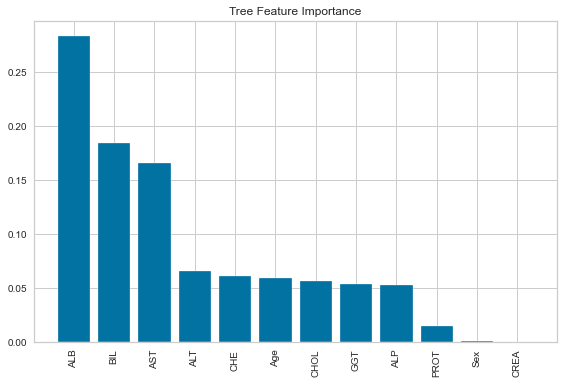

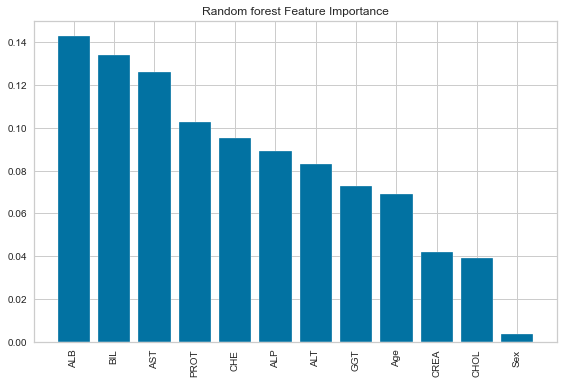

In [51]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=100, max_leaf_nodes=50).fit(X_trainb, y_trainb)
forest = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3).fit(X_trainb, y_trainb)

treeimportances = tree.feature_importances_
forestimportances = forest.feature_importances_

 
plt.title('Tree Feature Importance')
plt.bar(range(X_trainb.shape[1]), treeimportances[np.argsort(treeimportances)[::-1]], align='center')
plt.xticks(range(X_trainb.shape[1]), X_trainb.columns[np.argsort(treeimportances)[::-1]], rotation=90)
plt.tight_layout()
plt.show()

plt.title('Random forest Feature Importance')
plt.bar(range(X_trainb.shape[1]), forestimportances[np.argsort(forestimportances)[::-1]], align='center')
plt.xticks(range(X_trainb.shape[1]), X_trainb.columns[np.argsort(forestimportances)[::-1]], rotation=90)
plt.tight_layout()
plt.show()

* The same features are detected as most important in predicting the target variable using both methods and these features are ALB followed by BIL and AST.

* PROT looks more important in RF while it is unimportant in DT. SEX has very low importance (almost zero) in predicting the target in both models.

* CREA has no importance at all in DT, and it has very low importance in RF. The rest of the features seem to be more important in the Random forest model.

### Conclusion

- In this project, I have used supervised learning algorithms of machine learning to determine the condition of the liver in 614 patients based on some features collected from the patients' blood work and demographics. These algorithms are:
<br>

 - K Nearest Neighbor.
 - Gaussian Naive Bayes.
 - Decision Tree.
 - Random Forest.
 - Support Vector Machine.
 - Multi-Layer Perceptron.
 
<br>

- I chose to divide the proplem into two parts. First part is building all the models before using any sampling technique, and then based on the results of the different models, I found out that most models performed well, and the best model was the Random Forest since it has the best values of the metrics and the accuracy.
<br>

- Then, in part two, I used Random Over Sampler method to resample to observations and have them all balanced. Then, I repeated all the steps that I used in the first part. After building the models, I found out that most models performance increased to be almost perfect. Only one model was not a good choice in this problem since it got worse rather than improving which is Gaussian Naive Bayes. Finally, after comparing all the results, I found out that the best model in part two based on the metrics values and the accuracy is Support Vector Machine.
<br>

- Last part, I decided to see what are the most important features that I can only use and drop the rest without affecting the performance of my models. I used Random Forest and Decision Tree feature importances and from both I got three best features: ALB followed by BIL and AST. However, I found that almost all features have some importances that we might need to get good models and no need to remove any features. The only feature that we can get rid of without losing variability is Sex because both models showed almost zero importance for it.